# Azlamiya T A
## Data Science and Business Analytics
### Task 2 Prediction Using Unsupervised Machine Learning (Beginner)
##### To predict the optimum number of clusters and represent it visually

In [163]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import sys
import matplotlib.pyplot as plt

In [164]:
#Loading the iris dataset
iris = "D:\IRIS.csv"
iris_df = pd.read_csv(iris)

In [165]:
#Printing the contents of the dataframe
print(iris_df)
print(type(iris_df))
df = pd.DataFrame(iris_df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


In [166]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [167]:
iris_df.duplicated().sum()

3

In [168]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


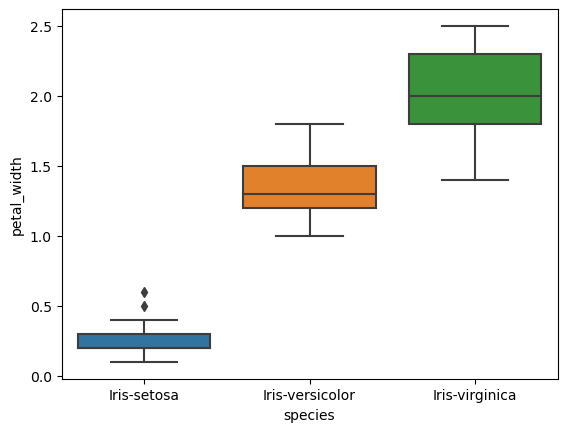

In [169]:
sns.boxplot(x='species', y='petal_width', data=df)
plt.show()

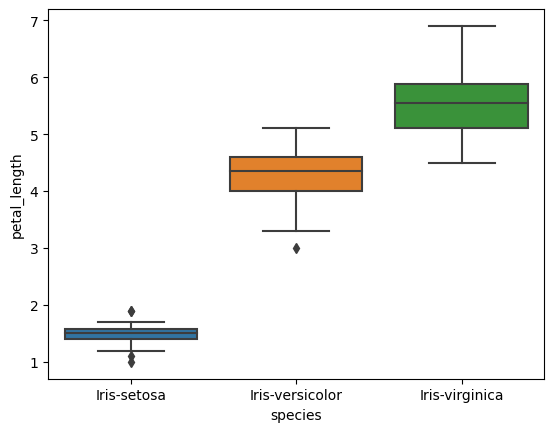

In [170]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()

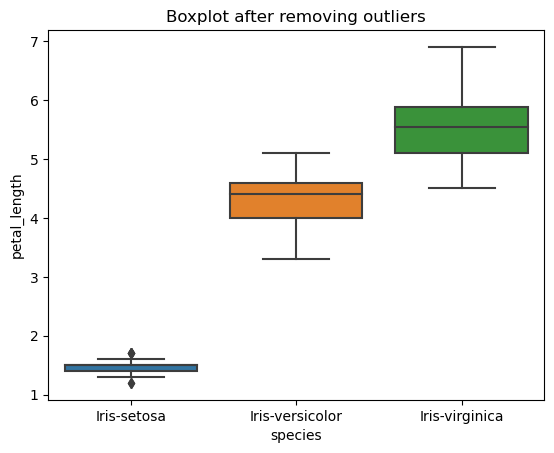

Original dataset shape: (150, 5)
Filtered dataset shape: (145, 5)


In [171]:
# Function to remove outliers using the IQR method for each species
def remove_outliers_iqr(df, column, group_by_column):
    # Group by the specified column
    groups = df.groupby(group_by_column)
    
    # Initialize a list to hold the filtered data
    filtered_data = []

    # Process each group separately
    for name, group in groups:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        filtered_data.append(filtered_group)

    # Concatenate the filtered data
    return pd.concat(filtered_data)

# Remove outliers in 'petal_length' within each 'species'
df1 = remove_outliers_iqr(df, 'petal_length', 'species')

# Display the boxplot after removing outliers
sns.boxplot(x='species', y='petal_length', data=df1)
plt.title('Boxplot after removing outliers')
plt.show()

print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df1.shape}")

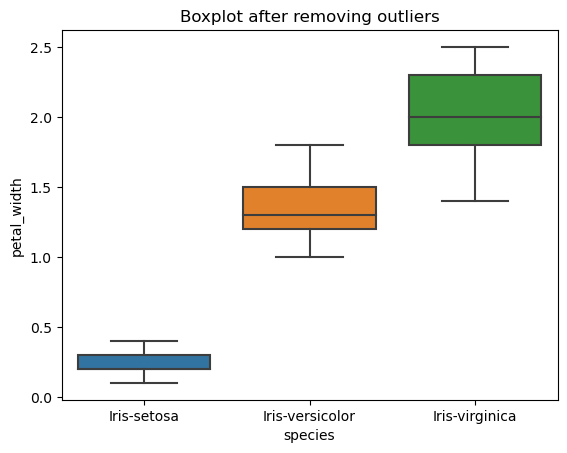

Original dataset shape: (150, 5)
Filtered dataset shape:      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[143 rows x 5 columns]


In [172]:
# Function to remove outliers using the IQR method for each species
def remove_outliers_iqr(df1, column, group_by_column):
    # Group by the specified column
    groups = df1.groupby(group_by_column)
    
    # Initialize a list to hold the filtered data
    filtered_data = []

    # Process each group separately
    for name, group in groups:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        filtered_data.append(filtered_group)

    # Concatenate the filtered data
    return pd.concat(filtered_data)

# Remove outliers in 'petal_length' within each 'species'
df2 = remove_outliers_iqr(df1, 'petal_width', 'species')

# Display the boxplot after removing outliers
sns.boxplot(x='species', y='petal_width', data=df2)
plt.title('Boxplot after removing outliers')
plt.show()

print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df2}")

In [173]:
x=df.iloc[:,[0,1,2,3]].values

In [174]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=i,n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:', i, 'wcss:', kmeans.inertia_)

C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 1 wcss: 680.8244


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 2 wcss: 152.36870647733906


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 3 wcss: 78.94084142614602


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 4 wcss: 57.31787321428571


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 5 wcss: 46.53558205128206


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 6 wcss: 38.930963049671746


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 7 wcss: 34.19698216257427


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 8 wcss: 30.083825236167343


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 9 wcss: 28.032802662999593


C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 10 wcss: 26.081818181818182


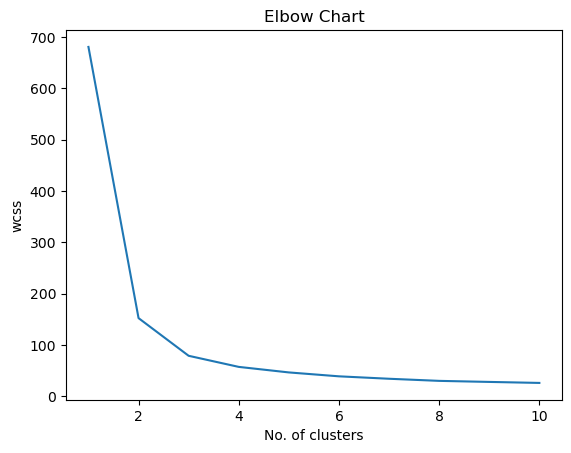

In [175]:
#plotting the results
plt.plot(range(1,11),wcss)
plt.title("Elbow Chart")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [176]:
#fitting the KMeans in the data
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300, random_state=0)

#Label for eacch data point based on the no. of clusters
y_kmeans=kmeans.fit_predict(x)
y_kmeans

C:\Users\aslamiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

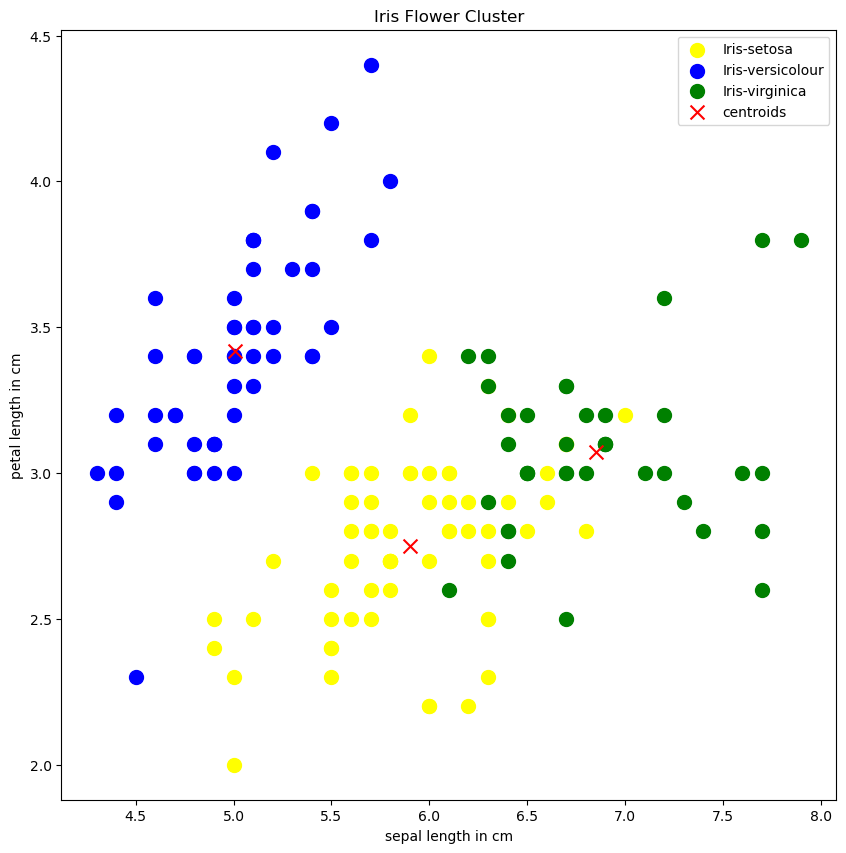

In [177]:
#visualizing clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='yellow', label= 'Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label= 'Iris-versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label= 'Iris-virginica')


#ploting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker = 'x', c = 'red', label = 'centroids')

#adding labels and title to the plot
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.title('Iris Flower Cluster')

#adding legend
plt.legend()

#displaying the plot
plt.show()